## Проектная работа

факультет: Data Science в медицине   
тема: Теория вероятностей и математическая статистика - анализ зависимостей  
исполнитель: Игорь Ростовский

Данные для исследования и анализа взяты из открытого источника: https://www.imdb.com/interfaces/ https://datasets.imdbws.com/

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snswx
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [29]:
basics = pd.read_csv('../terver/title.basics.tsv', sep='\t')
ratings = pd.read_csv('../terver/title.ratings.tsv', sep='\t')

In [30]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [31]:
basics.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8446940,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8446941,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8446942,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8446943,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
8446944,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy"


In [32]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1840
1,tt0000002,6.0,237
2,tt0000003,6.5,1601
3,tt0000004,6.0,154
4,tt0000005,6.2,2419


### Анализ средней продолжительности фильмов в зависимости от жанра  
Предположение: жанр влияет на среднюю продолжительность фильма  
Гипотеза H0: средняя продолжительность фильма не зависит от жанра  
Гипотеза H1: средняя продолжительность фильма зависит от жанра

In [33]:
# изучим доступные типы видео:
title_types = basics.titleType.unique()
print(title_types)

['short' 'movie' 'tvEpisode' 'tvSeries' 'tvShort' 'tvMovie' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']


In [34]:
# выберем кино (movie):
movies = basics[basics.titleType == 'movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


In [35]:
# удалим записи в которых не указана продолжительность фильма
# поменяем формат поля runtimeMinutes на int
movies = movies[movies.runtimeMinutes != '\\N']
movies['runtimeMinutes'] = movies['runtimeMinutes'].apply(lambda x: int(x))

<AxesSubplot:xlabel='runtimeMinutes'>

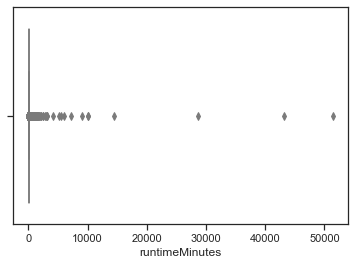

In [39]:
# посмотрим на распределение продолжительности фильмов в минутах:
sns.set(style="ticks", palette="pastel")

sns.boxplot(movies.runtimeMinutes, orient='v')

In [40]:
# в поле runtimeMinutes содержатся выбросы и/или некорректные записи, нужна очистка
# выберем только те фильмы, длина которых находится между 80 и 240 минутами
movies = movies[(movies.runtimeMinutes > 79) & (movies.runtimeMinutes < 241)]
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"
1739,tt0001756,movie,Lucha por la herencia,Lucha por la herencia,0,1911,\N,92,\N
2076,tt0002101,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History"


<AxesSubplot:xlabel='runtimeMinutes'>

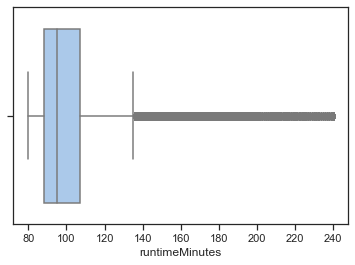

In [41]:
# посмотрим на распределение продолжительности фильмов в минутах:
sns.boxplot(movies.runtimeMinutes, orient='v')

In [43]:
# посмотрим на названия жанров:
genres = tuple(movies.genres.unique())
genres[:10]

('\\N',
 'Drama',
 'Adventure,Fantasy',
 'Drama,History',
 'Biography,Drama,Romance',
 'History,War',
 'Crime,Drama,Mystery',
 'Biography,Drama,History',
 'Drama,Fantasy,Horror',
 'Crime,Drama')

In [44]:
# каждый фильм относится к одному или сразу нескольким жанрам
# определим функцию, которая позволит отобрать нужные названия жанров в зависимости от заданного поиска

def get_target_genres(data, target):
    target_genres = []
    for genre in data:
        tmp_list = str(genre).lower().split(',') 
        for item in tmp_list:
            if item in target:
                target_genres.append(str(genre))
    return target_genres

В качестве жанров для исследования выберем:

* фэнтези (fantasy)
* ужасы (horror)
* боевик (action)

In [45]:
columns = ['tconst', 'primaryTitle', 'runtimeMinutes', 'genres']

fantasy_genres = get_target_genres(data=genres, target=('fantasy'))
fantasy_movies = movies[movies.genres.isin(fantasy_genres)].loc[:, columns].reset_index(drop=True)

horror_genres = get_target_genres(data=genres, target=('horror'))
horror_movies = movies[movies.genres.isin(horror_genres)].loc[:, columns].reset_index(drop=True)

action_genres = get_target_genres(data=genres, target=('action'))
action_movies = movies[movies.genres.isin(action_genres)].loc[:, columns].reset_index(drop=True)

Так как часть фильмов имеет смешанный жанр, выделим в 3 отдельные группы фильмы, которые:

* относятся к фэнтези, но не относятся к ужасам и боевикам
* относятся к ужасам, но не относится к фэнтези и боевикам
* относятся к боевикам, но не относятся к фэнтези и ужасам

In [46]:
fantasy = tuple(set(fantasy_movies.tconst) - set(horror_movies.tconst) - set(action_movies.tconst))
horror = tuple(set(horror_movies.tconst) - set(fantasy_movies.tconst) - set(action_movies.tconst))
action = tuple(set(action_movies.tconst) - set(fantasy_movies.tconst) - set(horror_movies.tconst))

In [47]:
fantasy_only = fantasy_movies[fantasy_movies.tconst.isin(fantasy)].reset_index(drop=True)
fantasy_only['genres'] = 'fantasy'

horror_only = horror_movies[horror_movies.tconst.isin(horror)].reset_index(drop=True)
horror_only['genres'] = 'horror'

action_only = action_movies[action_movies.tconst.isin(action)].reset_index(drop=True)
action_only['genres'] = 'action'

In [48]:
print(f'Fantasy only: {fantasy_only.shape[0]} movies')
print(f'Horror only: {horror_only.shape[0]} movies')
print(f'Action only: {action_only.shape[0]} movies')

Fantasy only: 5244 movies
Horror only: 13765 movies
Action only: 24114 movies


Получившиеся группы фильмов по жанрам отличаются по количеству.  
Для дальнейшнего анализа отберем из каждой группы (жанра) по 4000 наблюдений случайным образом.

In [49]:
n_sample = 4000

y1 = fantasy_only.sample(n=n_sample, random_state=42).runtimeMinutes.values
y2 = horror_only.sample(n=n_sample, random_state=42).runtimeMinutes.values
y3 = action_only.sample(n=n_sample, random_state=42).runtimeMinutes.values

n1 = len(y1)
n2 = len(y2)
n3 = len(y3)

n = n1 + n2 + n3
k = 3

print(f'Fantasy only: {n1}\nHorror only: {n2}\nAction only: {n3}\nTotal: {n}')

Fantasy only: 4000
Horror only: 4000
Action only: 4000
Total: 12000


In [50]:
y1_mean = np.mean(y1)
y2_mean = np.mean(y2)
y3_mean = np.mean(y3)

y1_s2 = np.var(y1, ddof=1)
y2_s2 = np.var(y2, ddof=1)
y3_s2 = np.var(y3, ddof=1)

print(f'Fantasy only runtime: mean = {np.round(y1_mean, 4)}, std = {np.round(y1_s2**0.5, 4)}')
print(f'Horror only runtime: mean = {np.round(y2_mean, 4)}, std = {np.round(y2_s2**0.5, 4)}')
print(f'Action only runtime: mean = {np.round(y3_mean, 4)}, std = {np.round(y3_s2**0.5, 4)}')

Fantasy only runtime: mean = 100.8115, std = 18.9685
Horror only runtime: mean = 94.5322, std = 13.6258
Action only runtime: mean = 105.8342, std = 23.6881


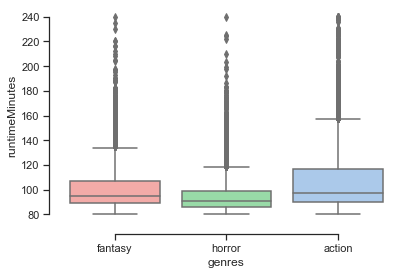

In [51]:
movies_only = pd.concat([fantasy_only, horror_only, action_only]).reset_index(drop=True)

sns.boxplot(x="genres", y="runtimeMinutes", palette=["r", "g", "b"], data=movies_only)
sns.despine(offset=10, trim=True)

In [52]:
y = np.concatenate([y1, y2, y3])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Total runtime: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Total runtime: mean = 100.3927, std = 19.753


In [53]:
ss_g = np.sum((y - y_mean)**2)
ss_f = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2 + ((y3_mean - y_mean)**2) * n3
ss_r = np.sum((y1 - y1_mean)**2) + np.sum((y2 - y2_mean)**2) + np.sum((y3 - y3_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(ss_f, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(ss_r, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 4681785.7547
Сумма квадратов отклонений средних групповых значений от общего среднего: 256522.9362
Остаточная сумма квадратов отклонений: 4425262.8185


In [54]:
s2_g = ss_g / (n - 1)
s2_f = ss_f / (k - 1)
s2_r = ss_r / (n - k)

print(f'Общая дисперсия: {np.round(s2_g, 4)}')
print(f'Факторная дисперсия: {np.round(s2_f, 4)}')
print(f'Остаточная дисперсия: {np.round(s2_r, 4)}')

Общая дисперсия: 390.1813
Факторная дисперсия: 128261.4681
Остаточная дисперсия: 368.8641


Распределение Фишера–Снедекора (F-распределение): https://www.matburo.ru/tv/table_fisher.pdf  
a = 0.01, v1 = k - 1 = 2, v2 = n - k = >60  
Fтабл = 4.60

In [55]:
f_h = s2_f / s2_r
f_critical = 4.60 

print(f'F = {np.round(f_h, 4)}')
print(f'F_critical = {np.round(f_critical, 4)}')

F = 347.7201
F_critical = 4.6


Полученное значение F = 347.7201 > Fкрит = 4.6.  
Таким образом, для фильмов продолжительностью [80, 240] минут, относящихся к жанрам фэнтези, ужасы и боевик, средняя продолжительность фильма зависит от жанра.  
Принимаем гипотезу H1.